> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Soccer Database Investigation by Odutayo Odufuwa)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I'd be investigating the Soccer Database (precisely the player table). Some of the important questions that'd be answered at the end of this investigation are:
>> 1. How may players have a penalty rating greater than average?
>> 2. What is the average height of players in comparing with their heading ability?
>> 3. What features contributes more to a player's overall rating?
>> 4. What is the age distribution of these players? What age range has a better overall rating?
>> 5. Does the height and weight of player affect his current overall rating?
        
> An the analysis of at least one dependent variable and three independent variables would also be done

> The data for this analysis is in a database on my local machine (downloaded from kaggle). The database contains 7 tables. To successfully import this data, I am going to make use of SQL to query the database so as to get the data relevant to our stated questions.

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import datetime as dt

### Load SQL magic commands

In [3]:
#Load the SQL extension to use magic commands.
%load_ext sql

### Load SQLLite database

In [4]:
# Load SQLite database
%sql sqlite:///soccer.sqlite

In [5]:
%%sql
SELECT name FROM sqlite_master WHERE type IN ('table','view') AND name NOT LIKE 'sqlite_%' ORDER BY 1

 * sqlite:///soccer.sqlite
Done.


name
Country
League
Match
Player
Player_Attributes
Team
Team_Attributes


##### There are 7 tables in the soccer database

##### However, the table important for our analysis and investigation is the <em>PLAYER</em> and <em>PLAYER_ATTRIBUTES</em> table

### Join Player and Player Attributes table to have one table

##### This would be done using a join SQL statement

#### The SQL Query below spools just left-players and their attributes for the year 2016 only

In [5]:
%%sql
select p.player_name, p.birthday, p.height, p.weight, a.overall_rating,
a.attacking_work_rate, a.defensive_work_rate, a.penalties, a.sliding_tackle, a.vision, a.aggression,
a.finishing, a.heading_accuracy, a.free_kick_accuracy, a.shot_power
from player p
inner join player_attributes a
using (player_api_id)
where substring(date,1,4) = '2016'
and preferred_foot = 'left'

 * sqlite:///soccer.sqlite
Done.


player_name,birthday,height,weight,overall_rating,attacking_work_rate,defensive_work_rate,penalties,sliding_tackle,vision,aggression,finishing,heading_accuracy,free_kick_accuracy,shot_power
Aaron Cresswell,1989-12-15 00:00:00,170.18,146,74,high,medium,59,78,66,68,53,58,69,71
Aaron Cresswell,1989-12-15 00:00:00,170.18,146,74,high,medium,59,78,66,68,53,58,69,71
Aaron Cresswell,1989-12-15 00:00:00,170.18,146,73,high,medium,59,78,65,67,52,57,69,71
Aaron Hunt,1986-09-04 00:00:00,182.88,161,77,medium,medium,81,35,76,59,72,64,76,76
Aaron Hunt,1986-09-04 00:00:00,182.88,161,77,medium,medium,81,35,76,59,72,64,76,76
Aaron Niguez,1989-04-26 00:00:00,170.18,143,70,medium,medium,67,37,62,45,67,54,68,74
Aaron Niguez,1989-04-26 00:00:00,170.18,143,70,medium,medium,67,37,62,45,67,54,68,74
Aaron Niguez,1989-04-26 00:00:00,170.18,143,70,medium,medium,67,37,62,45,67,54,68,74
Aaron Splaine,1996-10-13 00:00:00,172.72,163,55,medium,medium,55,45,55,49,52,43,43,54
Aaron Splaine,1996-10-13 00:00:00,172.72,163,55,medium,medium,55,45,55,49,52,43,43,54


In [6]:
left_result = _

In [7]:
left_footed_players = left_result.DataFrame()

In [8]:
left_footed_players.head()

,player_name,birthday,height,weight,overall_rating,attacking_work_rate,defensive_work_rate,penalties,sliding_tackle,vision,aggression,finishing,heading_accuracy,free_kick_accuracy,shot_power
0,Aaron Cresswell,1989-12-15 00:00:00,170.18,146,74,high,medium,59,78,66,68,53,58,69,71
1,Aaron Cresswell,1989-12-15 00:00:00,170.18,146,74,high,medium,59,78,66,68,53,58,69,71
2,Aaron Cresswell,1989-12-15 00:00:00,170.18,146,73,high,medium,59,78,65,67,52,57,69,71
3,Aaron Hunt,1986-09-04 00:00:00,182.88,161,77,medium,medium,81,35,76,59,72,64,76,76
4,Aaron Hunt,1986-09-04 00:00:00,182.88,161,77,medium,medium,81,35,76,59,72,64,76,76


##### N.B: I initially planned to use the SQL to get the data I needed from the soccer database, however,
##### it slowed down my notebook. So, I have decided to import and query the soccer database with a DBMS called
##### DB Browser for SQLite. The data spool was player information and their attributes (2016 specific attributes)
##### This was spooled and exported to a csv file called 'players.csv'. 

In [6]:
players_df = pd.read_csv('playerss.csv')

In [7]:
players_df.head()

,player_name,birthday,height,weight,overall_rating,attacking_work_rate,defensive_work_rate,penalties,sliding_tackle,vision,aggression,finishing,heading_accuracy,free_kick_accuracy,shot_power
0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,67.0,medium,medium,48.0,69.0,54.0,71.0,44.0,71.0,39.0,55.0
1,Aaron Cresswell,1989-12-15 00:00:00,170.18,146,74.0,high,medium,59.0,78.0,66.0,68.0,53.0,58.0,69.0,71.0
2,Aaron Cresswell,1989-12-15 00:00:00,170.18,146,74.0,high,medium,59.0,78.0,66.0,68.0,53.0,58.0,69.0,71.0
3,Aaron Cresswell,1989-12-15 00:00:00,170.18,146,73.0,high,medium,59.0,78.0,65.0,67.0,52.0,57.0,69.0,71.0
4,Aaron Doran,1991-05-13 00:00:00,170.18,163,65.0,medium,medium,61.0,24.0,68.0,60.0,58.0,60.0,63.0,61.0


In [8]:
print('There are ' + str(list(players_df.shape)[0]) + ' records and ' + str(list(players_df.shape)[1]) + ' fields')

There are 14103 records and 15 fields


<a id='wrangling'></a>
## Data Wrangling

In [109]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9537 entries, 0 to 14102
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   player_name          9537 non-null   object        
 1   birthday             9537 non-null   datetime64[ns]
 2   height               9537 non-null   float64       
 3   weight               9537 non-null   int64         
 4   overall_rating       9537 non-null   float64       
 5   attacking_work_rate  9537 non-null   object        
 6   defensive_work_rate  9537 non-null   object        
 7   penalties            9537 non-null   float64       
 8   sliding_tackle       9537 non-null   float64       
 9   vision               9537 non-null   float64       
 10  aggression           9537 non-null   float64       
 11  finishing            9537 non-null   float64       
 12  heading_accuracy     9537 non-null   float64       
 13  free_kick_accuracy   9537 non-nu

In [13]:
players_df.describe()

,height,weight,overall_rating,penalties,sliding_tackle,vision,aggression,finishing,heading_accuracy,free_kick_accuracy,shot_power
count,14103.000000,14103.000000,14098.000000,14098.000000,14098.000000,14098.000000,14098.000000,14098.000000,14098.000000,14098.000000,14098.000000
mean,181.624498,167.258668,70.382466,55.787062,49.167471,59.513051,62.490921,52.426231,58.516243,50.982338,64.591219
std,6.316981,14.841431,6.083105,15.316511,22.405052,14.013128,15.994451,18.955023,15.820643,17.783005,15.612248
min,160.020000,126.000000,47.000000,9.000000,5.000000,11.000000,11.000000,5.000000,8.000000,4.000000,11.000000
25%,177.800000,157.000000,66.000000,46.000000,27.000000,51.000000,53.000000,39.000000,51.000000,38.000000,59.000000
50%,182.880000,168.000000,71.000000,58.000000,56.000000,62.000000,66.000000,57.000000,61.000000,53.000000,68.000000
75%,185.420000,176.000000,75.000000,67.000000,69.000000,70.000000,74.000000,67.000000,69.000000,66.000000,75.000000
max,203.200000,225.000000,90.000000,96.000000,95.000000,94.000000,94.000000,90.000000,95.000000,94.000000,95.000000


In [9]:
players_df.isnull().sum()

player_name            0
birthday               0
height                 0
weight                 0
overall_rating         5
attacking_work_rate    5
defensive_work_rate    5
penalties              5
sliding_tackle         5
vision                 5
aggression             5
finishing              5
heading_accuracy       5
free_kick_accuracy     5
shot_power             5
dtype: int64

### Remove null values

In [10]:
players_df.dropna(inplace = True)

In [11]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14098 entries, 0 to 14102
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_name          14098 non-null  object 
 1   birthday             14098 non-null  object 
 2   height               14098 non-null  float64
 3   weight               14098 non-null  int64  
 4   overall_rating       14098 non-null  float64
 5   attacking_work_rate  14098 non-null  object 
 6   defensive_work_rate  14098 non-null  object 
 7   penalties            14098 non-null  float64
 8   sliding_tackle       14098 non-null  float64
 9   vision               14098 non-null  float64
 10  aggression           14098 non-null  float64
 11  finishing            14098 non-null  float64
 12  heading_accuracy     14098 non-null  float64
 13  free_kick_accuracy   14098 non-null  float64
 14  shot_power           14098 non-null  float64
dtypes: float64(10), int64(1), object(4)


In [12]:
players_df.duplicated().sum()

4561

### Remove duplicates

##### There are about 4561 records that are duplicated. These would be dropped

In [13]:
players_df.drop_duplicates(inplace = True)

In [14]:
players_df.duplicated().sum()

0

In [20]:
players_df.head()

,player_name,birthday,height,weight,overall_rating,attacking_work_rate,defensive_work_rate,penalties,sliding_tackle,vision,aggression,finishing,heading_accuracy,free_kick_accuracy,shot_power
0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,67.0,medium,medium,48.0,69.0,54.0,71.0,44.0,71.0,39.0,55.0
1,Aaron Cresswell,1989-12-15 00:00:00,170.18,146,74.0,high,medium,59.0,78.0,66.0,68.0,53.0,58.0,69.0,71.0
3,Aaron Cresswell,1989-12-15 00:00:00,170.18,146,73.0,high,medium,59.0,78.0,65.0,67.0,52.0,57.0,69.0,71.0
4,Aaron Doran,1991-05-13 00:00:00,170.18,163,65.0,medium,medium,61.0,24.0,68.0,60.0,58.0,60.0,63.0,61.0
5,Aaron Galindo,1982-05-08 00:00:00,182.88,198,69.0,medium,medium,37.0,68.0,54.0,70.0,21.0,68.0,40.0,59.0


### Data is still Unclean !!!

#### Some player names still appear more than once. The dataset must be cleaned to accept only one entry per player

In [21]:
players_df.groupby('player_name')['overall_rating'].count()

player_name
Aaron Appindangoye    1
Aaron Cresswell       2
Aaron Doran           1
Aaron Galindo         1
Aaron Hunt            1
                     ..
Zlatko Junuzovic      4
Zoltan Stieber        1
Zoran Tosic           4
Zouhaier Dhaouadhi    1
Zouhair Feddal        2
Name: overall_rating, Length: 5538, dtype: int64

#### Apparently, our analysis may not need us to have unique players per record.

>> One the problems I encountered in the data wrangling phase is that I tried to query the database right from my notebook which made the notebook hang a lot. I eventually opened the Soccer DB in a DBMS environment called DB Lite, ran my query to get the needed data, export the data and re-imported into my notebook using pandas.

### Data Cleaning (Create new features)

In [15]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
players_df['birthday'].value_counts()

1991-01-08 00:00:00    15
1988-01-29 00:00:00    14
1991-03-29 00:00:00    13
1991-01-07 00:00:00    13
1997-05-15 00:00:00    12
                       ..
1989-05-10 00:00:00     1
1989-09-16 00:00:00     1
1991-10-25 00:00:00     1
1977-05-29 00:00:00     1
1988-10-16 00:00:00     1
Name: birthday, Length: 3585, dtype: int64

In [16]:
players_df['birthday'] = pd.to_datetime(players_df['birthday'])

In [17]:
players_df['birthday'].value_counts()

1991-01-08    15
1988-01-29    14
1991-03-29    13
1991-01-07    13
1997-05-15    12
              ..
1989-05-10     1
1989-09-16     1
1991-10-25     1
1977-05-29     1
1988-10-16     1
Name: birthday, Length: 3585, dtype: int64

### Create an age column

In [18]:
players_df.head()

,player_name,birthday,height,weight,overall_rating,attacking_work_rate,defensive_work_rate,penalties,sliding_tackle,vision,aggression,finishing,heading_accuracy,free_kick_accuracy,shot_power
0,Aaron Appindangoye,1992-02-29,182.88,187,67.0,medium,medium,48.0,69.0,54.0,71.0,44.0,71.0,39.0,55.0
1,Aaron Cresswell,1989-12-15,170.18,146,74.0,high,medium,59.0,78.0,66.0,68.0,53.0,58.0,69.0,71.0
3,Aaron Cresswell,1989-12-15,170.18,146,73.0,high,medium,59.0,78.0,65.0,67.0,52.0,57.0,69.0,71.0
4,Aaron Doran,1991-05-13,170.18,163,65.0,medium,medium,61.0,24.0,68.0,60.0,58.0,60.0,63.0,61.0
5,Aaron Galindo,1982-05-08,182.88,198,69.0,medium,medium,37.0,68.0,54.0,70.0,21.0,68.0,40.0,59.0


In [19]:
def age(birthday):
    today = dt.date.today()
    return today.year - birthday.year - ((today.month, today.day) < (birthday.month, birthday.day))

In [20]:
players_df['age'] = players_df['birthday'].apply(lambda x: age(x))

In [21]:
players_df.head()

,player_name,birthday,height,weight,overall_rating,attacking_work_rate,defensive_work_rate,penalties,sliding_tackle,vision,aggression,finishing,heading_accuracy,free_kick_accuracy,shot_power,age
0,Aaron Appindangoye,1992-02-29,182.88,187,67.0,medium,medium,48.0,69.0,54.0,71.0,44.0,71.0,39.0,55.0,30
1,Aaron Cresswell,1989-12-15,170.18,146,74.0,high,medium,59.0,78.0,66.0,68.0,53.0,58.0,69.0,71.0,32
3,Aaron Cresswell,1989-12-15,170.18,146,73.0,high,medium,59.0,78.0,65.0,67.0,52.0,57.0,69.0,71.0,32
4,Aaron Doran,1991-05-13,170.18,163,65.0,medium,medium,61.0,24.0,68.0,60.0,58.0,60.0,63.0,61.0,31
5,Aaron Galindo,1982-05-08,182.88,198,69.0,medium,medium,37.0,68.0,54.0,70.0,21.0,68.0,40.0,59.0,40


<a id='eda'></a>
## Exploratory Data Analysis

> Now we can explore the data based on the various questions
### Research Question 1 (Players with Penalty Rating higher than the average)

In [22]:
# Average penalty rating
average_penalty_rating = players_df['penalties'].mean()
average_penalty_rating

55.60123728635839

In [23]:
good_penalty_takers = players_df[players_df['penalties'] >= average_penalty_rating]
good_penalty_takers.head()

,player_name,birthday,height,weight,overall_rating,attacking_work_rate,defensive_work_rate,penalties,sliding_tackle,vision,aggression,finishing,heading_accuracy,free_kick_accuracy,shot_power,age
1,Aaron Cresswell,1989-12-15,170.18,146,74.0,high,medium,59.0,78.0,66.0,68.0,53.0,58.0,69.0,71.0,32
3,Aaron Cresswell,1989-12-15,170.18,146,73.0,high,medium,59.0,78.0,65.0,67.0,52.0,57.0,69.0,71.0,32
4,Aaron Doran,1991-05-13,170.18,163,65.0,medium,medium,61.0,24.0,68.0,60.0,58.0,60.0,63.0,61.0,31
6,Aaron Hunt,1986-09-04,182.88,161,77.0,medium,medium,81.0,35.0,76.0,59.0,72.0,64.0,76.0,76.0,35
12,Aaron Mooy,1990-09-15,175.26,150,75.0,medium,medium,73.0,62.0,81.0,75.0,69.0,46.0,78.0,70.0,31


In [24]:
bad_penalty_takers = players_df[players_df['penalties'] < average_penalty_rating]
bad_penalty_takers.head()

,player_name,birthday,height,weight,overall_rating,attacking_work_rate,defensive_work_rate,penalties,sliding_tackle,vision,aggression,finishing,heading_accuracy,free_kick_accuracy,shot_power,age
0,Aaron Appindangoye,1992-02-29,182.88,187,67.0,medium,medium,48.0,69.0,54.0,71.0,44.0,71.0,39.0,55.0,30
5,Aaron Galindo,1982-05-08,182.88,198,69.0,medium,medium,37.0,68.0,54.0,70.0,21.0,68.0,40.0,59.0,40
8,Aaron Kuhl,1996-01-30,172.72,146,61.0,medium,high,42.0,57.0,61.0,75.0,32.0,47.0,40.0,53.0,26
10,Aaron Lennox,1993-02-19,190.50,181,48.0,medium,medium,41.0,12.0,15.0,21.0,15.0,16.0,18.0,26.0,29
21,Aaron Splaine,1996-10-13,172.72,163,55.0,medium,medium,55.0,45.0,55.0,49.0,52.0,43.0,43.0,54.0,25


### Average Overall rating of Good Penalty Takers VS Bad Penalty Takers

In [25]:
good_penalty_takers.overall_rating.mean()

71.8864854517611

In [26]:
bad_penalty_takers.overall_rating.mean()

68.60491537213076

##### This implies that better players are generally good penalty takers

### Research Question 2  (Does a player height affect his heading accuracy)

In [27]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
heading_df = players_df[['height', 'heading_accuracy']]
heading_df

,height,heading_accuracy
0,182.88,71.0
1,170.18,58.0
3,170.18,57.0
4,170.18,60.0
5,182.88,68.0
...,...,...
14097,170.18,52.0
14098,170.18,52.0
14100,180.34,42.0
14101,190.50,73.0


Text(0, 0.5, 'Heading Accuracy')

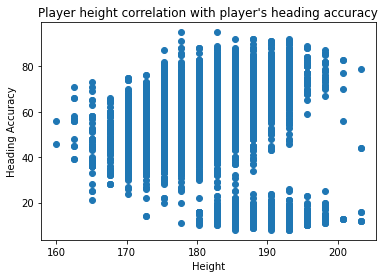

In [52]:
plt.scatter(heading_df['height'], heading_df['heading_accuracy'])
plt.title("Player height correlation with player's heading accuracy")
plt.xlabel("Height")
plt.ylabel("Heading Accuracy")

#### There is a positive correlation which implies that the taller a player is the better his heading accuracy

array([[<AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'heading_accuracy'}>]], dtype=object)

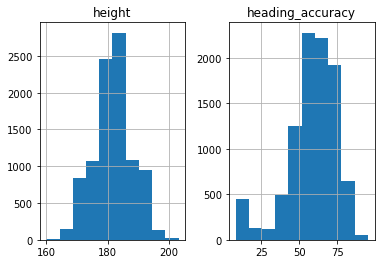

In [29]:
heading_df.hist()

### Research Question 3  (What features contribute more to a player's overall rating)

<AxesSubplot:xlabel='attacking_work_rate'>

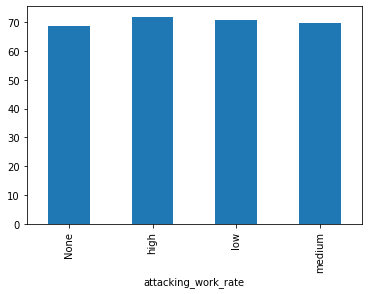

In [30]:
players_df.groupby('attacking_work_rate').overall_rating.mean().plot(kind='bar')

<AxesSubplot:>

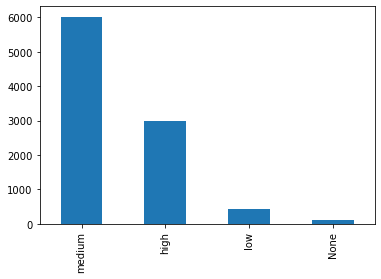

In [31]:
players_df['attacking_work_rate'].value_counts().plot(kind = 'bar')

#### Although most players have medium attacking work rate, players with high attacking work rate generally have a higher overall rating

<AxesSubplot:xlabel='defensive_work_rate'>

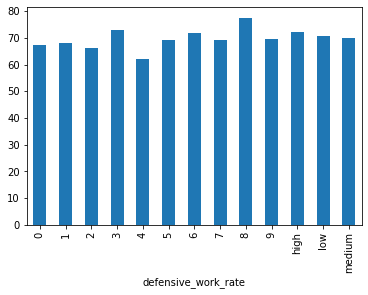

In [32]:
players_df.groupby('defensive_work_rate').overall_rating.mean().plot(kind='bar')

#### The defensive work rate values are inconsistent. The numerical values would be converted to the either low, medium, or high

In [33]:
players_df['defensive_work_rate'].value_counts()

medium    6598
high      1825
low       1006
1           22
2           19
0           15
7           15
6           14
5           12
3            4
9            3
4            2
8            2
Name: defensive_work_rate, dtype: int64

> The values 0,1,2,...,9 would be converted to 'low', 'medium', and 'high'.
>> 0 - 3 would represent players with low defensive work rate
>> 4 - 6 would represent players with medium defensive work rate
>> 7 - 9 would represent players with high defensive work rate

In [34]:
players_df['defensive_work_rate'] = players_df['defensive_work_rate'].map({'0':'low', '1':'low', '2':'low', '3':'low',
                             '4':'medium', '5':'medium', '6':'medium',
                             '7':'high', '8':'high', '9':'high', 'low':'low', 'medium':'medium', 'high':'high'})

<AxesSubplot:>

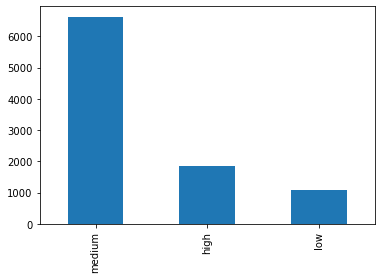

In [35]:
players_df['defensive_work_rate'].value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='defensive_work_rate'>

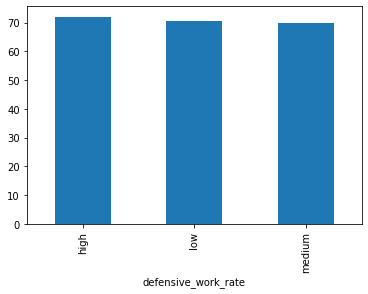

In [36]:
players_df.groupby('defensive_work_rate').overall_rating.mean().plot(kind='bar')

##### Also, players with higher defensive work rate tend to have higher overall ratings

### Let's look at how players weight and height affect their overall rating

In [37]:
hw_df = players_df[['height', 'weight', 'overall_rating']]

Text(0, 0.5, 'Overall Rating')

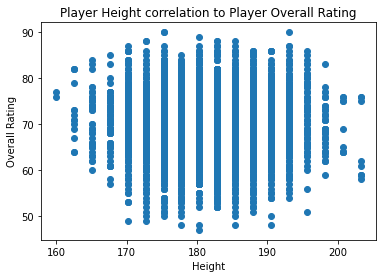

In [53]:
plt.scatter(hw_df.height, hw_df.overall_rating)
plt.title("Player Height correlation to Player Overall Rating")
plt.xlabel("Height")
plt.ylabel("Overall Rating")

Text(0, 0.5, 'Overall Rating')

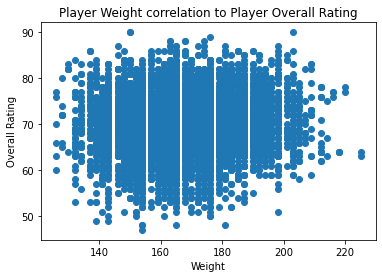

In [54]:
plt.scatter(hw_df.weight, hw_df.overall_rating)
plt.title("Player Weight correlation to Player Overall Rating")
plt.xlabel("Weight")
plt.ylabel("Overall Rating")

In [66]:
hw_df.corr()

,height,weight,overall_rating
height,1.000000,0.754089,0.005810
weight,0.754089,1.000000,0.070379
overall_rating,0.005810,0.070379,1.000000


<AxesSubplot:>

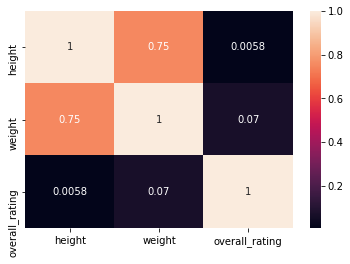

In [41]:
sns.heatmap(hw_df.corr(), annot = True)

##### These scatter plots and heatmap show that there is no correlation between aplayer's height/weight and his overall_rating

In [42]:
players_df.head(1)

,player_name,birthday,height,weight,overall_rating,attacking_work_rate,defensive_work_rate,penalties,sliding_tackle,vision,aggression,finishing,heading_accuracy,free_kick_accuracy,shot_power,age
0,Aaron Appindangoye,1992-02-29,182.88,187,67.0,medium,medium,48.0,69.0,54.0,71.0,44.0,71.0,39.0,55.0,30


### Let's look at the correlation between a player's free-kick accuracy and his overall rating

Text(0, 0.5, 'Overall Rating')

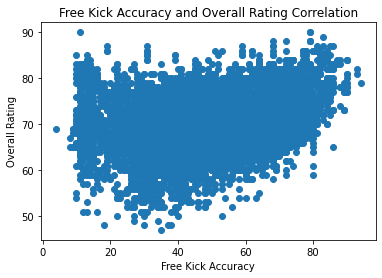

In [56]:
plt.scatter(players_df.free_kick_accuracy, players_df.overall_rating)
plt.title("Free Kick Accuracy and Overall Rating Correlation")
plt.xlabel("Free Kick Accuracy")
plt.ylabel("Overall Rating")

<AxesSubplot:>

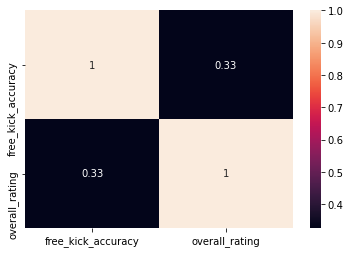

In [44]:
sns.heatmap(players_df[['free_kick_accuracy', 'overall_rating']].corr(), annot = True)

In [45]:
players_df[['free_kick_accuracy', 'overall_rating']].corr()

,free_kick_accuracy,overall_rating
free_kick_accuracy,1.000000,0.327332
overall_rating,0.327332,1.000000


##### This shows that a player's freekick accuracy may not necessarily correlate with a player's overall rating

In [46]:
players_df.corr()['overall_rating'].to_frame()

,overall_rating
height,0.005810
weight,0.070379
overall_rating,1.000000
penalties,0.310792
sliding_tackle,0.115810
vision,0.438586
aggression,0.260720
finishing,0.288957
heading_accuracy,0.254589
free_kick_accuracy,0.327332


In [47]:
from IPython.display import Image
  
# get the image
Image(url='https://miro.medium.com/max/932/1*Qz_gwy4ZaSZuOpl3IyO2HA.png', width=600, height=300)

> Using the correlation values above, 
>> features that have a negligible correlation with overall_rating are:
height, weight, sliding tackle, aggression, finishing, heading_accuracy, and age

>> The other features such as penalties, vision, free kick accuracy, shot power have a low positive correlation with overall rating

### Research Question 4  ( What is the age distribution of these players? What age range has a better overall rating?)

Text(0, 0.5, 'Count')

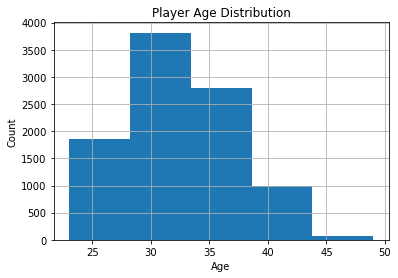

In [58]:
players_df.age.hist(bins = 5)
plt.title("Player Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")

In [49]:
### Research Question 3  (Does the height and weight of player affect his current overall rating?)
age_avg_rating = players_df.groupby('age').overall_rating.mean().to_frame()

<BarContainer object of 27 artists>

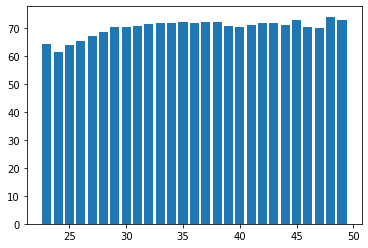

In [50]:
plt.bar(age_avg_rating.index, age_avg_rating.overall_rating)

<a id='conclusions'></a>
## Conclusions

> After a thourough data analysis process, these are the conclusions:
>Better players are generally good penalty takers; 
>There is a positive correlation which implies that the taller a player is the better his heading accuracy
>Although most players have medium attacking work rate, players with high attacking work rate generally have a higher overall rating
>Also, players with higher defensive work rate tend to have higher overall ratings
>The correlation between a player's height/weight and his overall_rating is negligible
>The correlation between a player's freekick accuracy may not necessarily correlate with a player's overall rating which implies a low positive correlation.
> Using the correlation values above, 
>> features that have a negligible correlation with overall_rating are:
height, weight, sliding tackle, aggression, finishing, heading_accuracy, and age

>> The other features such as penalties, vision, free kick accuracy, shot power have a low positive correlation with overall rating

> Limitations: I initially planned to use the SQL to get the data I needed from the soccer database, however, it slowed down my notebook. So, I have decided to import and query the soccer database with a DBMS called DB Browser for SQLite. The data spool was player information and their attributes (2016 specific attributes). This was spooled and exported to a csv file called 'players.csv'. 

In [ ]:
def find_max(nums):
    max_num = float("-inf")
    for num in nums:
        if num > max_num:
            max_num = num
    return max_num

In [ ]:
a = [1,10,6,100,2000,5,9,1000000,700,2389922,111]

In [ ]:
find_max(a)